링크 [https://www.kaggle.com/datasets/prachi13/customer-analytics/data]

In [130]:
# 한글 설정
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [131]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
from dotenv import load_dotenv

print(load_dotenv())

False


In [133]:
!kaggle datasets download prachi13/customer-analytics

Dataset URL: https://www.kaggle.com/datasets/prachi13/customer-analytics
License(s): other
customer-analytics.zip: Skipping, found more recently modified local copy (use --force to force download)


In [134]:
import zipfile

HOME = os.getcwd()

zip_file_path = os.path.join(HOME,'customer-analytics.zip')
extract_to_path = os.path.join(HOME,'data')

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)
    print(f"압축 해제 완료: {extract_to_path}")
# 해제된 파일 목록 확인
print("현재 폴더 파일 목록:", os.listdir(extract_to_path))

압축 해제 완료: c:\Users\User\github\DataScience\Ecom_Shipping\data
현재 폴더 파일 목록: ['Train.csv']


데이터셋 불러오기

In [135]:
HOME = os.getcwd()

df_csv= os.path.join(extract_to_path,'train.csv')

df = pd.read_csv(df_csv)

df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**컬럼 소개 (California Housing Dataset)**

행의 수 : 10999 <br>
컬럼 수 : 12 

* **ID**: 고객 ID 번호
* **Warehouse block**: 창고 구역 (A, B, C, D, E 블록으로 구분)
* **Mode of shipment**: 배송 수단 (선박, 항공, 도로)
* **Customer care calls**: 배송 문의를 위해 고객 센터에 전화한 횟수
* **Customer rating**: 고객 평점 (1: 가장 낮음/최악, 5: 가장 높음/최고)
* **Cost of rhthe product**: 제품 가격 (미국 달러 기준)
* **Prior purchases**: 이전 구매 횟수
* **Product importance**: 제품 중요도 (낮음, 중간, 높음으로 분류)
* **Gender**: 성별 (남성, 여성)
* **Discount offered**: 해당 제품에 제공된 할인액
* **Weight in gms**: 제품 무게 (그램 단위)
* **Reached on time**: 정시 도착 여부 (타겟 변수 - 1: 정시에 도착하지 않음, 0: 정시에 도착함)

### [배송 지연 원인](https://pthms.com/news/shipment-delay-what-are-the-causal-factors-of-delays-in-shipments-?utm_source=chatgpt.com)
* 악천후 / 외부 요인: 폭풍, 안개 등 기상 악화나 사고가 운송 경로의 안전을 위협하여 이동이 중단되거나 늦어지는 현상을 의미<br>
-> 외부 환경 데이터의 부재 (기상, 사고)<br>
* 일정 변경 및 교통 문제: 운항 스케줄의 변동이나 도로·항로의 병목 현상으로 인해 정해진 출발 및 도착 시간이 지연되는 상황<br>
-> 운송 데이터의 부재 (운송 스케줄, 도로·항로의 병목 현상)<br>
* 세관 문제: 국제 운송 시 서류 부실이나 규정 위반으로 인해 국경 통과를 위한 검사와 승인 절차가 길어지는 것을 의미<br>
-> 제품 가격(Cost), 할인액(Discount)<br>
* 터미널 혼잡: 항구, 공항, 물류 창고 등에 화물이 몰려 상하차 및 처리 대기 시간이 길어지면서 배송이 늦어지는 상태를 의미<br>
-> 배송 수단(Mode), 창고 구역(Block)<br>
* 적재 제외(롤드/오프로드): 운송 수단의 용량 부족이나 서류 문제로 인해 화물이 계획된 편편에 실리지 못하고 다음 차례로 밀려나는 현상을 의미<br>
-> 제품 중요도(Importance), 무게(Weight)<br>

+정시 도착 여부와 고객들의 관계<br>
-> 고객 문의 횟수 (Customer care calls),고객 평점 (Customer rating),이전 구매 횟수 (Prior purchases),성별 (Gender)

In [137]:
# Reached on time을 target으로 변경
df['target'] = df['Reached.on.Time_Y.N']
df = df.drop(columns=['Reached.on.Time_Y.N'])
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,target
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [138]:
# 1. 특정 범위 설정
x_min, x_max = 1000, 2000
y_min, y_max = 0, 10
# 2. 조건에 맞는 데이터 필터링
subset = df[
    (df['Weight_in_gms'] >= x_min) & (df['Weight_in_gms'] <= x_max) & 
    (df['Discount_offered'] >= y_min) & (df['Discount_offered'] <= y_max)
]
# 3. 개수 출력
count = len(subset)
print(f"해당 영역({x_min}~{x_max}, {y_min}~{y_max}) 내의 점 개수: {count}개")
print(f"그 중 배송 지연(target=1)인 개수: {subset['target'].sum()}개")

해당 영역(1000~2000, 0~10) 내의 점 개수: 2123개
그 중 배송 지연(target=1)인 개수: 1077개


### 데이터 분석

#### **Reached on time**: 정시 도착 여부 (타겟 변수 - 1: 정시에 도착하지 않음, 0: 정시에 도착함)

In [139]:
df['target'].value_counts()

target
1    6563
0    4436
Name: count, dtype: int64

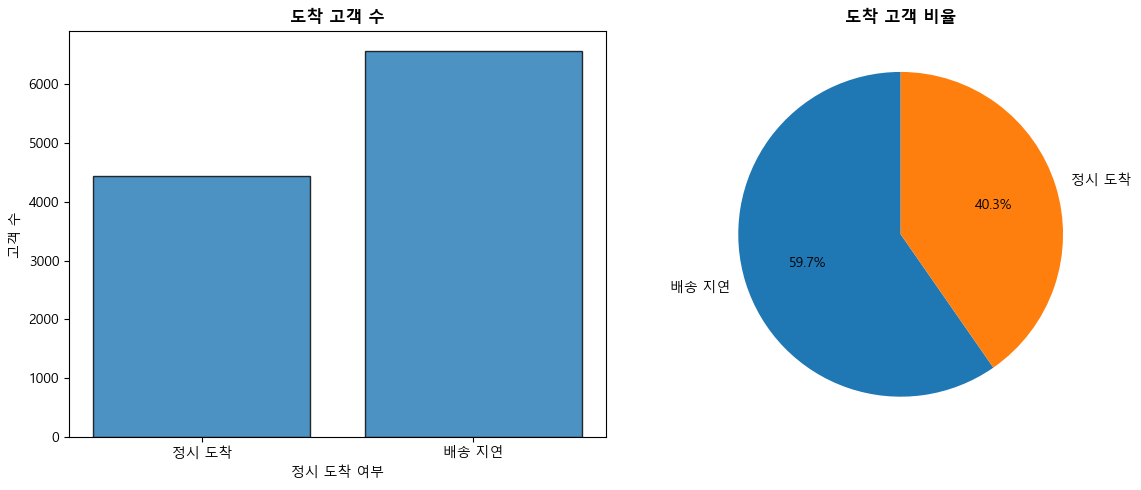

In [140]:
class_counts = df['target'].value_counts()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 막대 그래프
axes[0].bar(df['target'].unique(), class_counts.values, edgecolor='black', alpha=0.8)
axes[0].set_title('도착 고객 수', fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['정시 도착', '배송 지연'])
axes[0].set_xlabel('정시 도착 여부')
axes[0].set_ylabel('고객 수')

# 파이 차트
m_labels = ['배송 지연', '정시 도착'] 
axes[1].pie(class_counts.values, labels=m_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('도착 고객 비율', fontweight='bold')
plt.tight_layout()
plt.show()

#### **ID**: 고객 ID 번호

In [141]:
print(f"중복되지 않은 데이터 수: {df['ID'].nunique()}")
print("중복된 데이터 수:", df['ID'].duplicated().sum())
print("중복된 데이터가 많아서 ID 삭제")

중복되지 않은 데이터 수: 10999
중복된 데이터 수: 0
중복된 데이터가 많아서 ID 삭제


In [142]:
mean_val = df['target'].mean()

#### **Warehouse block**: 창고 구역 (A, B, C, D, E 블록으로 구분)

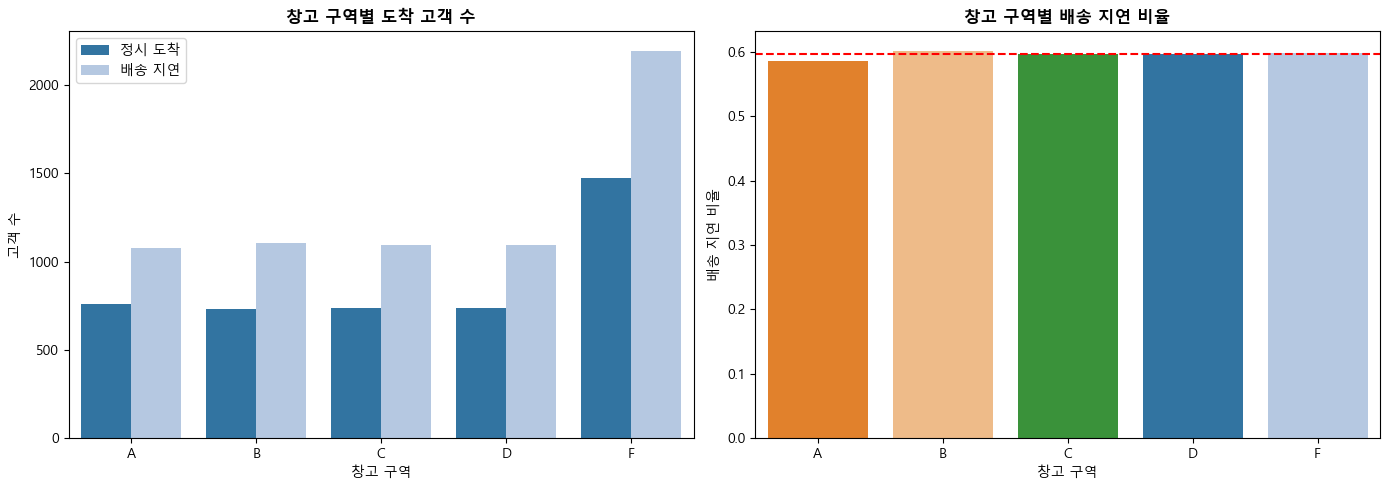

In [143]:
sorted_warehouse = sorted(df['Warehouse_block'].unique())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Warehouse_block', hue='target', data=df, order=sorted_warehouse, palette='tab20', ax=axes[0])
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_title('창고 구역별 도착 고객 수', fontweight='bold')
axes[0].set_xlabel('창고 구역')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Warehouse_block', y='target', data=df, order=sorted_warehouse, palette='tab20', hue='Warehouse_block', errorbar=None, ax=axes[1])
axes[1].set_title('창고 구역별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xlabel('창고 구역')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Mode of shipment**: 배송 수단 (선박, 항공, 도로)

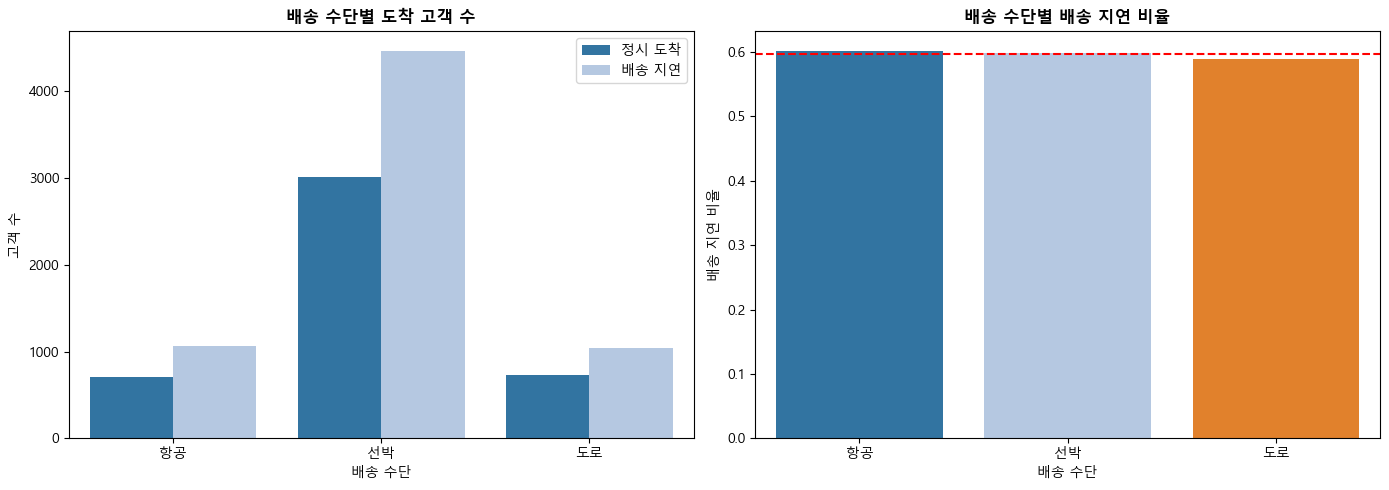

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Mode_of_Shipment', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('배송 수단별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['항공', '선박','도로'])
axes[0].set_xlabel('배송 수단')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Mode_of_Shipment', y='target', data=df, palette='tab20', hue='Mode_of_Shipment', errorbar=None, ax=axes[1])
axes[1].set_title('배송 수단별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['항공', '선박','도로'])
axes[1].set_xlabel('배송 수단')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Customer care calls**: 배송 문의를 위해 고객 센터에 전화한 횟수

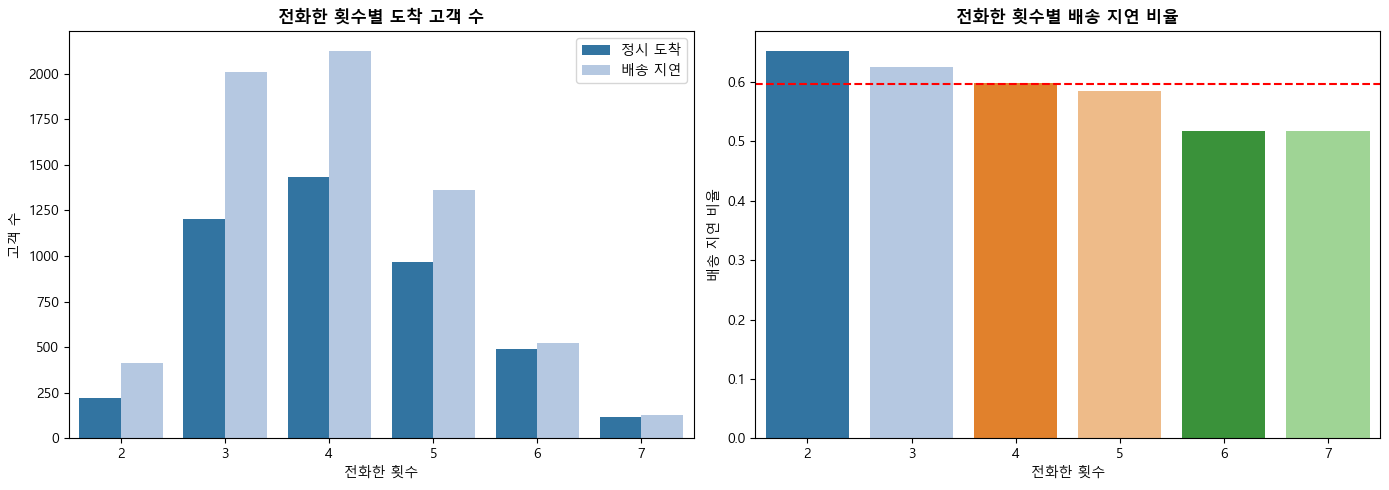

In [145]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Customer_care_calls', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('전화한 횟수별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('전화한 횟수')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Customer_care_calls', y='target', data=df, palette='tab20', hue='Customer_care_calls', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('전화한 횟수별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xlabel('전화한 횟수')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Customer rating**: 고객 평점 (1: 가장 낮음/최악, 5: 가장 높음/최고)

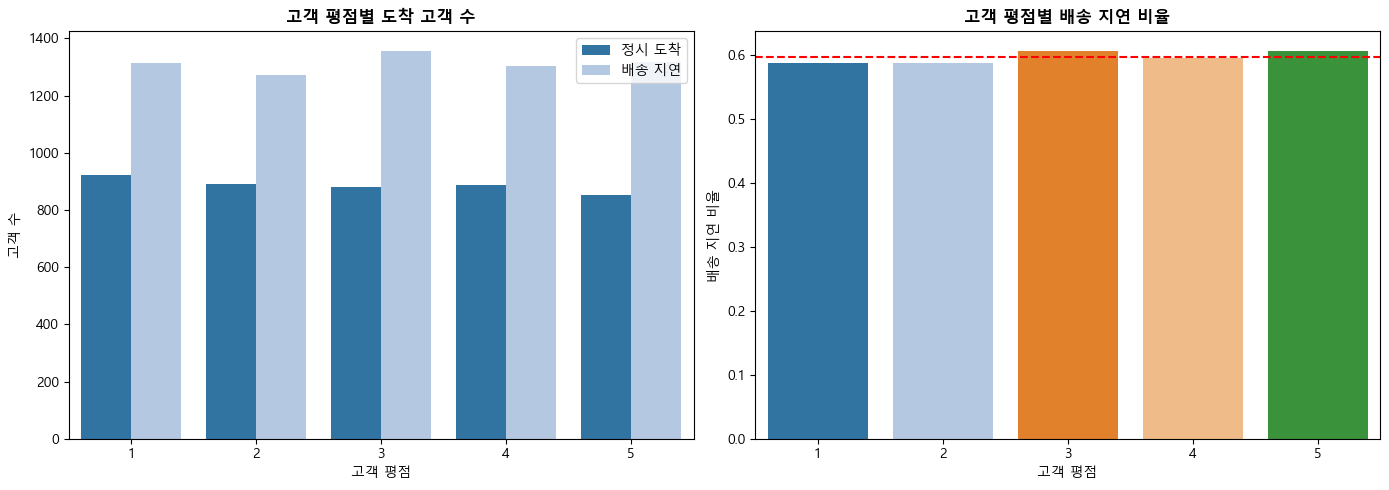

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Customer_rating', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('고객 평점별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('고객 평점')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Customer_rating', y='target', data=df, palette='tab20', hue='Customer_rating', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('고객 평점별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xlabel('고객 평점')
axes[1].set_ylabel('배송 지연 비율')
plt.tight_layout()
plt.show()

#### **Cost of the product**: 제품 가격 (미국 달러 기준)

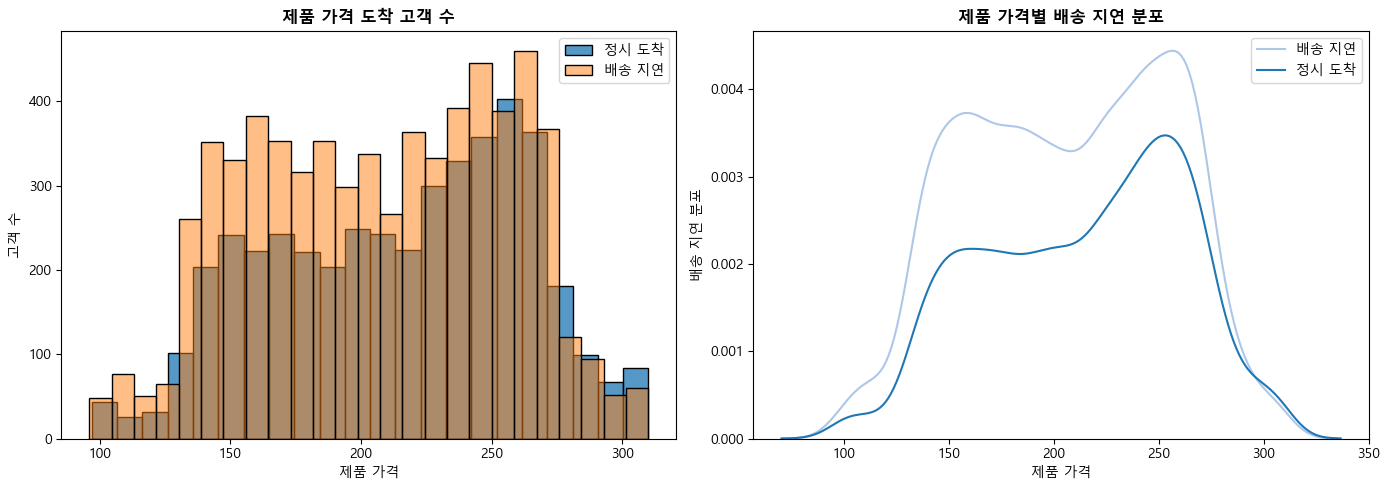

In [147]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Cost_of_the_Product'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Cost_of_the_Product'], ax=axes[0], alpha=0.5)
axes[0].set_title('제품 가격 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('제품 가격')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Cost_of_the_Product', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('제품 가격별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('제품 가격')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

#### **Prior purchases**: 이전 구매 횟수

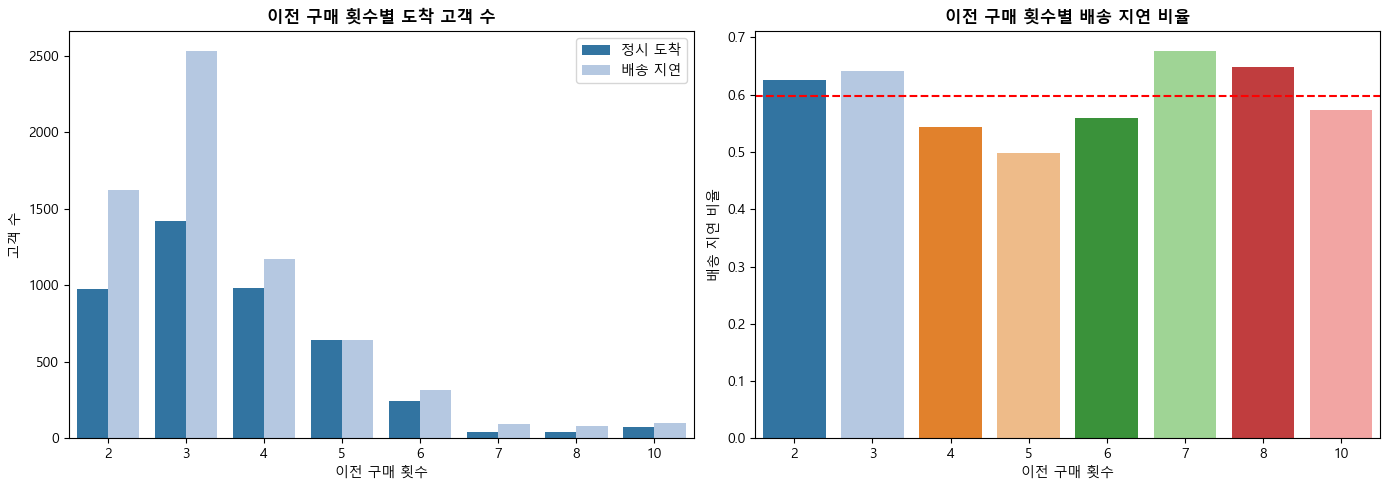

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Prior_purchases', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('이전 구매 횟수별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('이전 구매 횟수')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Prior_purchases', y='target', data=df, palette='tab20', hue='Prior_purchases', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('이전 구매 횟수별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xlabel('이전 구매 횟수')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Product importance**: 제품 중요도 (낮음, 중간, 높음으로 분류)

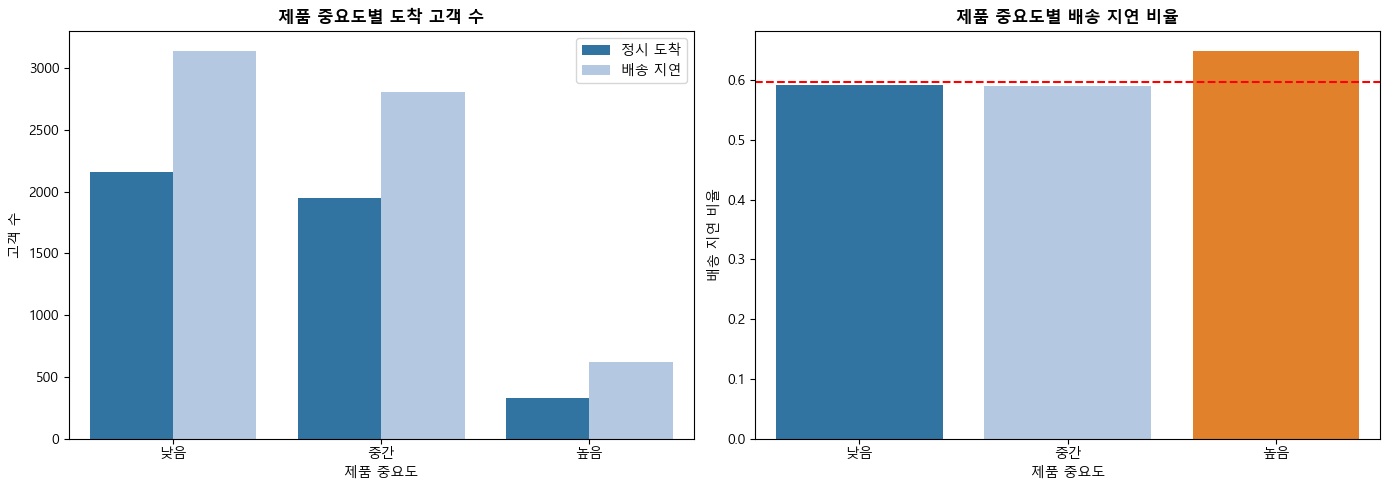

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Product_importance', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('제품 중요도별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['낮음', '중간', '높음'])
axes[0].set_xlabel('제품 중요도')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Product_importance', y='target', data=df, palette='tab20', hue='Product_importance', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('제품 중요도별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['낮음', '중간', '높음'])
axes[1].set_xlabel('제품 중요도')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Gender**: 성별 (남성, 여성)

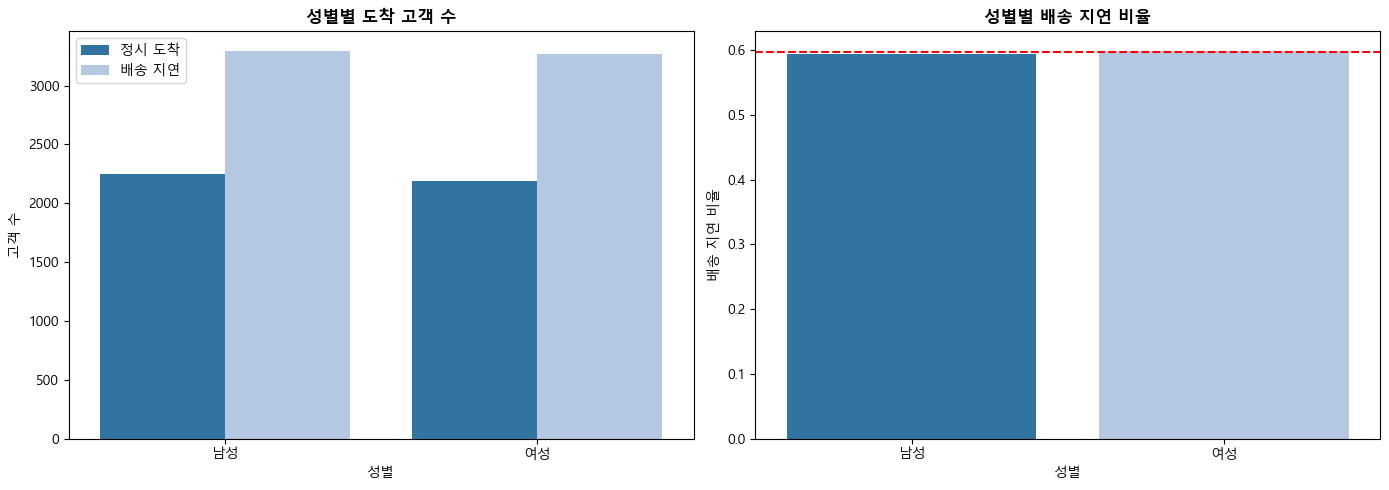

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Gender', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('성별별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['남성', '여성'])
axes[0].set_xlabel('성별')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Gender', y='target', data=df, palette='tab20', hue='Gender', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('성별별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['남성', '여성'])
axes[1].set_xlabel('성별')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

### **Discount offered**: 해당 제품에 제공된 할인액

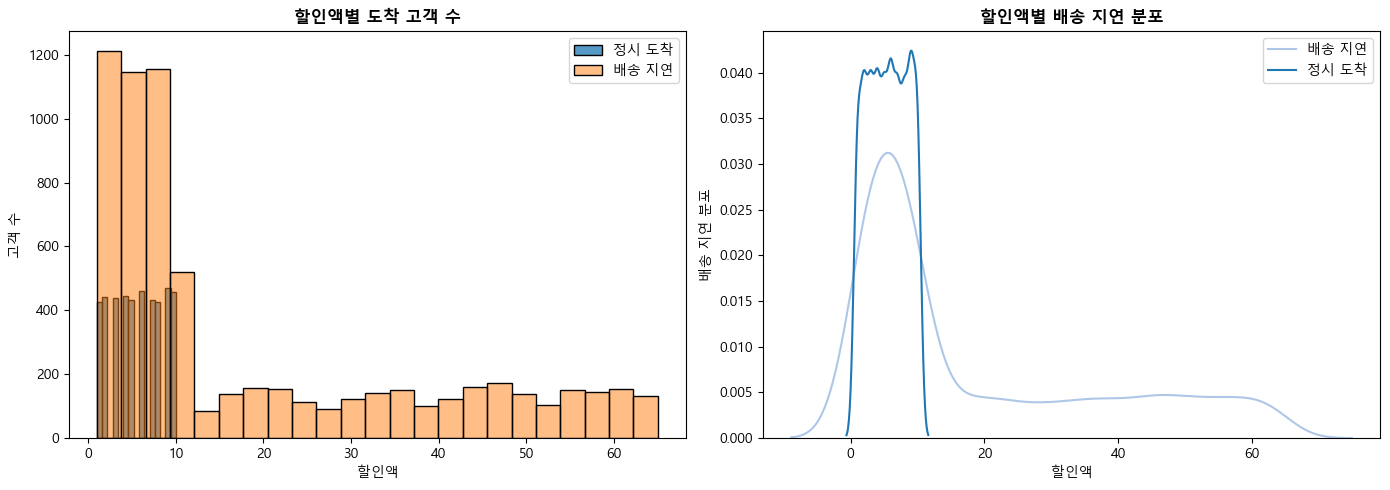

In [151]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Discount_offered'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Discount_offered'], ax=axes[0], alpha=0.5)
axes[0].set_title('할인액별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('할인액')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Discount_offered', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('할인액별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('할인액')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

### **Weight in gms**: 제품 무게 (그램 단위)

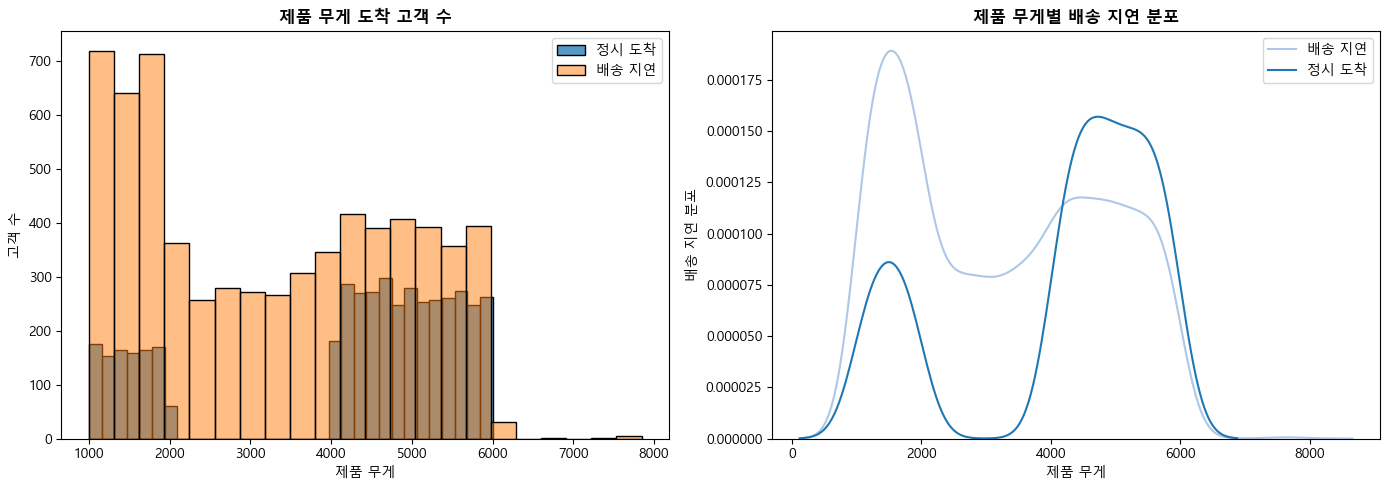

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Weight_in_gms'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Weight_in_gms'], ax=axes[0], alpha=0.5)
axes[0].set_title('제품 무게 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('제품 무게')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Weight_in_gms', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('제품 무게별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('제품 무게')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

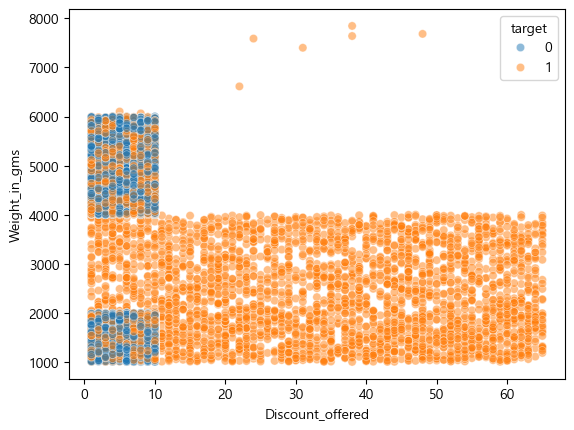

In [153]:
sns.scatterplot(x='Discount_offered', y='Weight_in_gms', hue='target', data=df, alpha=0.5)
plt.show()

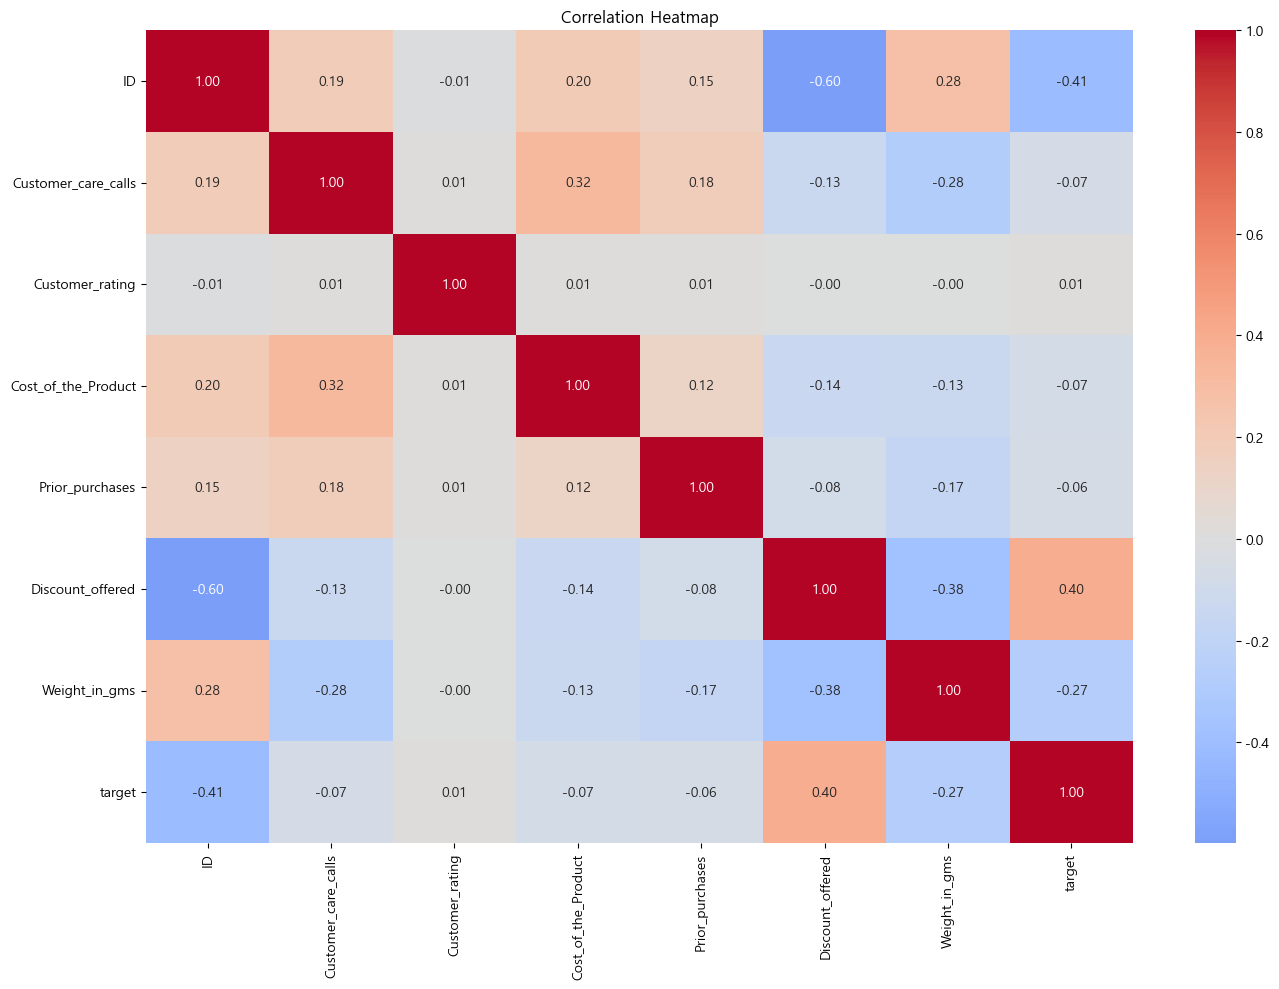

In [154]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop(columns=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']).corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

지연 결정 요인: 
* 할인 제공 수준 (세관 문제 추정)
* 상품 무게 (적재 제외 추정)

운영 변수: <br>
터미널 혼잡(배송 수단·창고 구역)이 지연에 미치는 영향은 미미함<br>
고객 변수: <br>
개인 특성(성별, 평점 등)은 지연 여부와 통계적으로 무관함<br>

결론: 물류 지연은 고객 특성이나 인프라 환경보다 통관 행정(가격) 및 적재 공정(무게) 등 화물 처리 데이터와 밀접하게 관련되어 있음

### 2. 특성 엔지니어링

In [155]:
# 1. 할인액 범주화 (Discount_Category) -> 범위
# 할인율 10%를 기점으로 '낮음'과 '높음'으로 분류합니다.
df['Discount_Category'] = pd.cut(df['Discount_offered'], bins=[0, 10, 100], labels=['Low', 'High'], include_lowest=True)

# 2. 무게 구간 분류 (Weight_Category) -> 범위
# 연속적인 무게 데이터를 지연 패턴에 따라 가벼움, 보통, 무거움의 3개 구간으로 나눕니다.
df['Weight_Category'] = pd.cut(df['Weight_in_gms'], bins=[0, 2000, 4000, 8000], labels=['Light', 'Medium', 'Heavy'])

# 3. 무게 대비 할인 비중 (Discount_Weight_Ratio) -> 지연 결정 요인
# 화물 무게와 할인 금액 간의 관계를 계산하여 저가 신고 의심 여부를 분석합니다.
df['Discount_Weight_Ratio'] = df['Discount_offered'] / (df['Weight_in_gms'] + 1)

# 4. 최종 결제 금액 (Final_Cost) -> 세관 문제
# 제품 가격에 할인율을 적용하여 고객이 실제로 지불한 최종 금액을 산출합니다.
df['Final_Cost'] = df['Cost_of_the_Product'] * (1 - df['Discount_offered'] / 100)

# 5. 중요도별 무게 비중 (Weight_Load_Factor) -> 적재 제외
# 제품 중요도 대비 무게를 계산하여 적재 시 우선순위에서 밀려날 가능성을 수치화합니다.
importance_map = {'low': 1, 'medium': 2, 'high': 3}
df['Weight_Load_Factor'] = df['Weight_in_gms'] / (df['Product_importance'].map(importance_map))


삭제할 컬럼
* 터미널 혼잡<br>
-> 배송 수단(Mode), 창고 구역(Block)<br>
* 정시 도착 여부와 고객들의 관계<br>
-> 고객 문의 횟수 (Customer care calls),고객 평점 (Customer rating),이전 구매 횟수 (Prior purchases),성별 (Gender)<br>

In [156]:
df = df.drop(['ID','Warehouse_block','Mode_of_Shipment','Customer_care_calls','Customer_rating','Prior_purchases','Gender'], axis=1)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Cost_of_the_Product    10999 non-null  int64   
 1   Product_importance     10999 non-null  object  
 2   Discount_offered       10999 non-null  int64   
 3   Weight_in_gms          10999 non-null  int64   
 4   target                 10999 non-null  int64   
 5   Discount_Category      10999 non-null  category
 6   Weight_Category        10999 non-null  category
 7   Discount_Weight_Ratio  10999 non-null  float64 
 8   Final_Cost             10999 non-null  float64 
 9   Weight_Load_Factor     10999 non-null  float64 
dtypes: category(2), float64(3), int64(4), object(1)
memory usage: 709.3+ KB


* 라벨 인코딩(Label Encoding)

In [158]:
from sklearn.preprocessing import LabelEncoder

categorical_features = df.select_dtypes(include=['object','category']).columns.tolist()

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cost_of_the_Product    10999 non-null  int64  
 1   Product_importance     10999 non-null  int64  
 2   Discount_offered       10999 non-null  int64  
 3   Weight_in_gms          10999 non-null  int64  
 4   target                 10999 non-null  int64  
 5   Discount_Category      10999 non-null  int64  
 6   Weight_Category        10999 non-null  int64  
 7   Discount_Weight_Ratio  10999 non-null  float64
 8   Final_Cost             10999 non-null  float64
 9   Weight_Load_Factor     10999 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 859.4 KB


* 원-핫 인코딩(One-Hot Encoding)

In [159]:
# df = pd.get_dummies(df, columns=['Discount_Category','Weight_Category'])

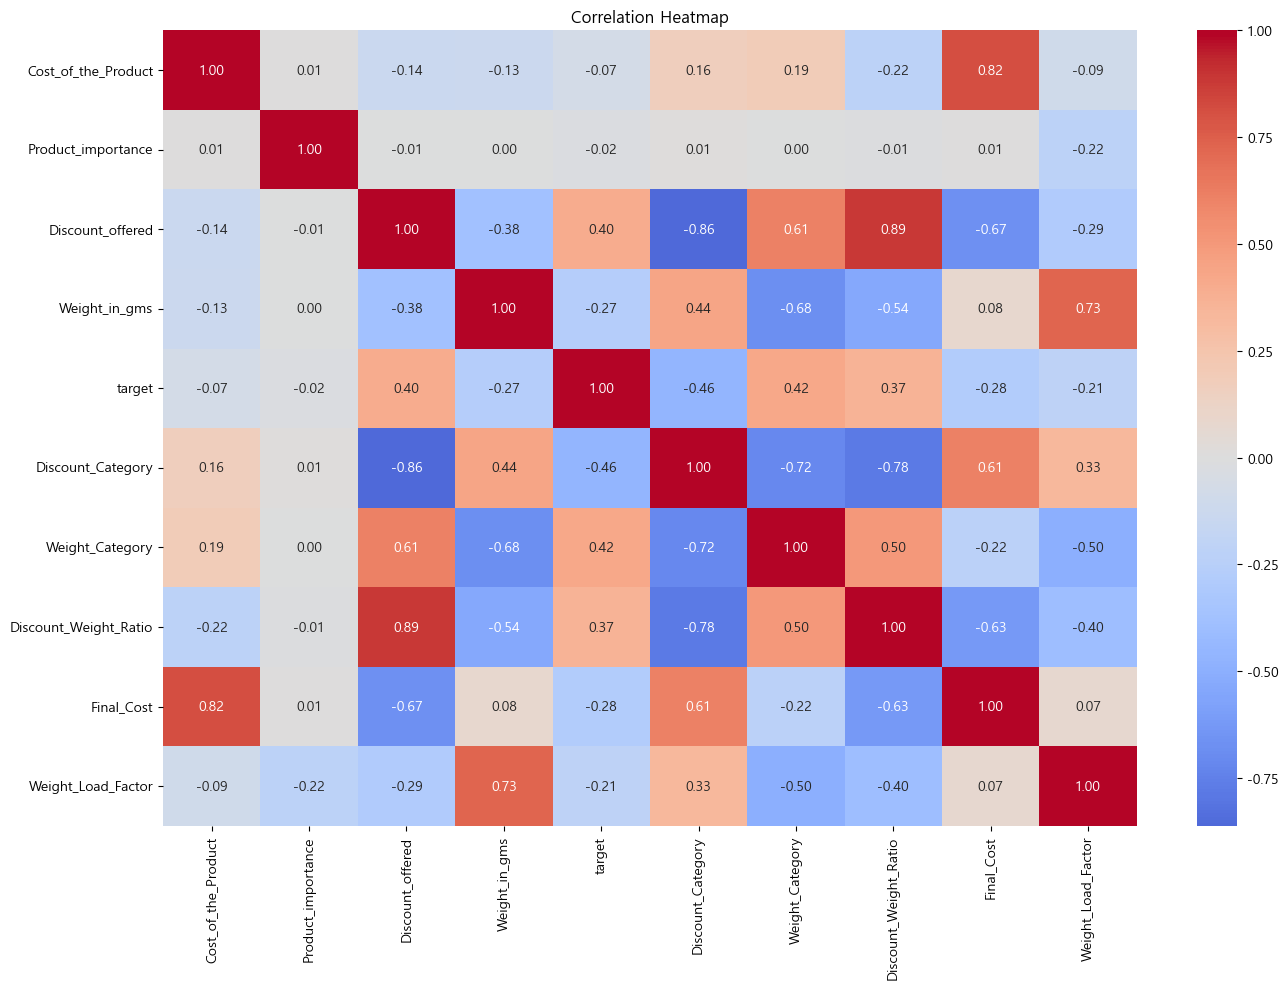

In [160]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [161]:
df.describe().round(4)

,Cost_of_the_Product,Product_importance,Discount_offered,Weight_in_gms,target,Discount_Category,Weight_Category,Discount_Weight_Ratio,Final_Cost,Weight_Load_Factor
count,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000
mean,210.1968,1.3460,13.3732,3634.0167,0.5967,0.7593,0.6201,0.0060,183.1640,2601.6454
std,48.0633,0.6314,16.2055,1635.3773,0.4906,0.4275,0.7488,0.0094,56.9073,1553.1516
min,96.0000,0.0000,1.0000,1001.0000,0.0000,0.0000,0.0000,0.0002,36.6300,335.6667
25%,169.0000,1.0000,4.0000,1839.5000,0.0000,1.0000,0.0000,0.0009,140.1500,1400.0000
50%,214.0000,1.0000,7.0000,4149.0000,1.0000,1.0000,0.0000,0.0017,186.2400,2196.5000
75%,251.0000,2.0000,10.0000,5050.0000,1.0000,1.0000,1.0000,0.0062,231.2800,3859.5000
max,310.0000,2.0000,65.0000,7846.0000,1.0000,1.0000,2.0000,0.0595,306.9000,6000.0000


* 표준화(Standardization)

In [162]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df['Cost_of_the_Product'] = standard_scaler.fit_transform(df['Cost_of_the_Product'].values.reshape(-1,1))
df['Discount_offered'] = standard_scaler.fit_transform(df['Discount_offered'].values.reshape(-1,1))
df['Weight_in_gms'] = standard_scaler.fit_transform(df['Weight_in_gms'].values.reshape(-1,1))
df['Discount_Weight_Ratio'] = standard_scaler.fit_transform(df['Discount_Weight_Ratio'].values.reshape(-1,1))
df['Final_Cost'] = standard_scaler.fit_transform(df['Final_Cost'].values.reshape(-1,1))
df['Weight_Load_Factor'] = standard_scaler.fit_transform(df['Weight_Load_Factor'].values.reshape(-1,1))


df.describe().round(4)

,Cost_of_the_Product,Product_importance,Discount_offered,Weight_in_gms,target,Discount_Category,Weight_Category,Discount_Weight_Ratio,Final_Cost,Weight_Load_Factor
count,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000
mean,-0.0000,1.3460,-0.0000,-0.0000,0.5967,0.7593,0.6201,0.0000,-0.0000,0.0000
std,1.0000,0.6314,1.0000,1.0000,0.4906,0.4275,0.7488,1.0000,1.0000,1.0000
min,-2.3761,0.0000,-0.7636,-1.6101,0.0000,0.0000,0.0000,-0.6157,-2.5751,-1.4590
25%,-0.8572,1.0000,-0.5784,-1.0974,0.0000,1.0000,0.0000,-0.5335,-0.7559,-0.7737
50%,0.0791,1.0000,-0.3933,0.3149,1.0000,1.0000,0.0000,-0.4477,0.0541,-0.2609
75%,0.8490,2.0000,-0.2082,0.8659,1.0000,1.0000,1.0000,0.0213,0.8456,0.8099
max,2.0766,2.0000,3.1859,2.5757,1.0000,1.0000,2.0000,5.6981,2.1744,2.1881


In [163]:
from sklearn.model_selection import train_test_split

# df에 target값은 y_total 나머지는 x_total에 넣는디
x_total = df.drop(columns=['target'])
y_total = df['target']

x_train,x_test,y_train,y_test = train_test_split(x_total,y_total,test_size=0.2,random_state=42)

In [164]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# 2. 모델 학습
model.fit(x_train, y_train)

# 3. 모델 예측
y_pred = model.predict(x_test)

# 4. 모델 평가
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59       895
           1       0.72      0.66      0.69      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



### 모델링

### Logistic Regression

In [165]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

predictor = LogisticRegression()

predictor.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [166]:
# 검증 데이터 성능 평가
y_pred = predictor.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('=== 검증 데이터 분류 성능 ===')
print(f'Accuracy (정확도): {accuracy:.4f}')
print(f'Precision (정밀도): {precision:.4f}')
print(f'Recall (재현율): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

=== 검증 데이터 분류 성능 ===
Accuracy (정확도): 0.6773
Precision (정밀도): 0.7937
Recall (재현율): 0.6161
F1 Score: 0.6937


=== 특성 중요도 ===


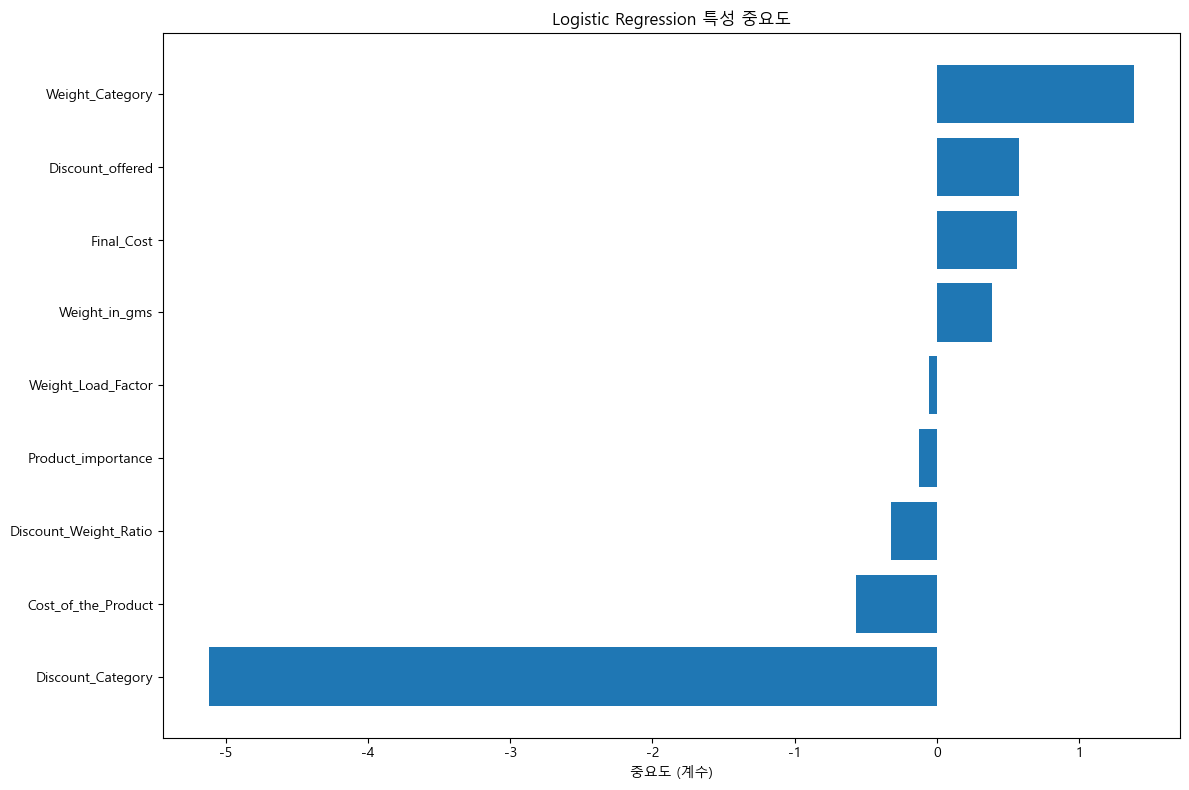

In [167]:
# 특성 중요도
print('=== 특성 중요도 ===')
feature_importance = pd.DataFrame({
    'feature': x_train.columns,
    'importance': predictor.coef_[0]
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))

top_features = feature_importance

plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('중요도 (계수)')
plt.title('Logistic Regression 특성 중요도')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

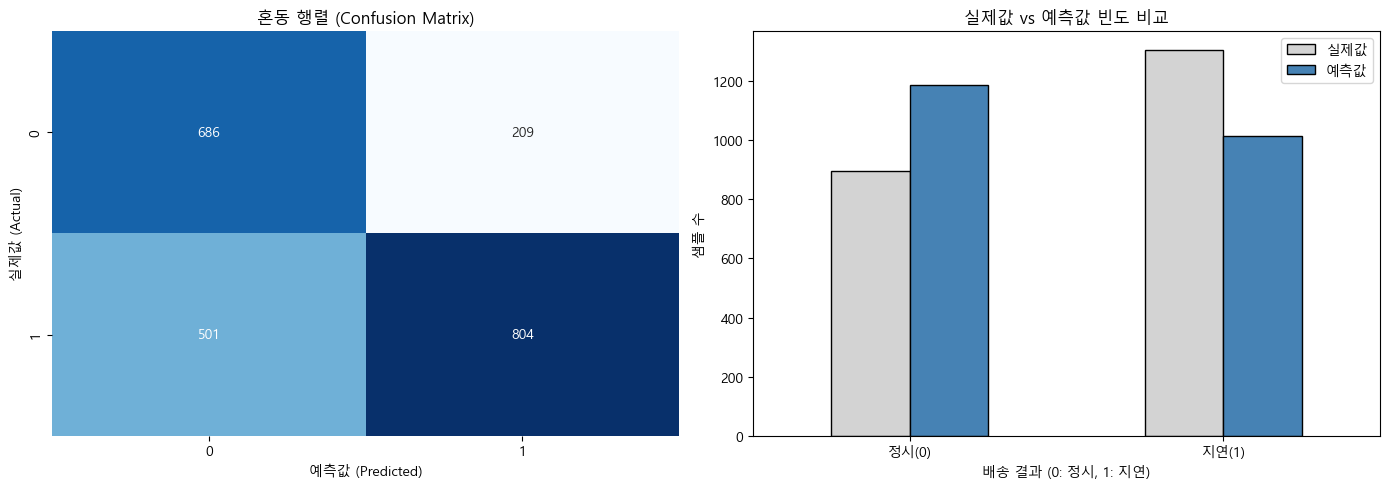

예측 통계:
- 전체 샘플 수: 2200
- 정답 수: 1490
- 정확도(Accuracy): 0.6773


In [168]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값 생성 (타겟 변수명인 'target' 사용)
best_predictions = predictor.predict(x_test)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_xlabel('예측값 (Predicted)')
axes[0].set_ylabel('실제값 (Actual)')
axes[0].set_title('혼동 행렬 (Confusion Matrix)')

# 2. 실제값 vs 예측값 빈도 비교
comparison_df = pd.DataFrame({
    '실제값': y_test.value_counts().sort_index(),
    '예측값': pd.Series(best_predictions).value_counts().sort_index()
})
comparison_df.plot(kind='bar', ax=axes[1], color=['lightgray', 'steelblue'], edgecolor='black')
axes[1].set_xlabel('배송 결과 (0: 정시, 1: 지연)')
axes[1].set_ylabel('샘플 수')
axes[1].set_title('실제값 vs 예측값 빈도 비교')
axes[1].set_xticklabels(['정시(0)', '지연(1)'], rotation=0)

plt.tight_layout()
plt.show()

# 분류 통계 출력
correct = (y_test == best_predictions).sum()
total = len(y_test)
print(f'예측 통계:')
print(f'- 전체 샘플 수: {total}')
print(f'- 정답 수: {correct}')
print(f'- 정확도(Accuracy): {(correct/total):.4f}')

### Decision Tree

In [169]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
predictor = DecisionTreeClassifier()
predictor.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [170]:
# 검증 데이터 성능 평가
y_pred = predictor.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('=== 검증 데이터 분류 성능 ===')
print(f'Accuracy (정확도): {accuracy:.4f}')
print(f'Precision (정밀도): {precision:.4f}')
print(f'Recall (재현율): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

=== 검증 데이터 분류 성능 ===
Accuracy (정확도): 0.6414
Precision (정밀도): 0.6940
Recall (재현율): 0.7073
F1 Score: 0.7006


=== 특성 중요도 ===


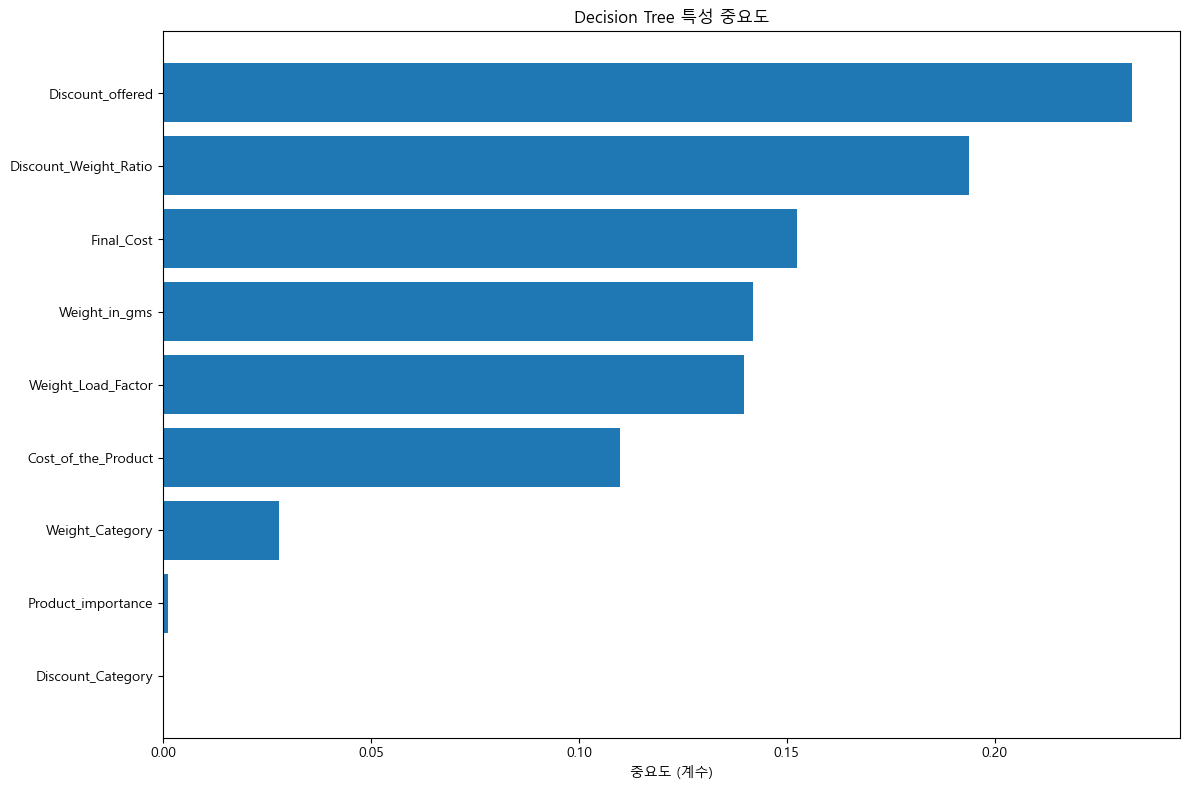

In [171]:
# 특성 중요도
print('=== 특성 중요도 ===')
feature_importance = pd.DataFrame({
    'feature': x_train.columns,
    'importance': predictor.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))

top_features = feature_importance

plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('중요도 (계수)')
plt.title('Decision Tree 특성 중요도')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

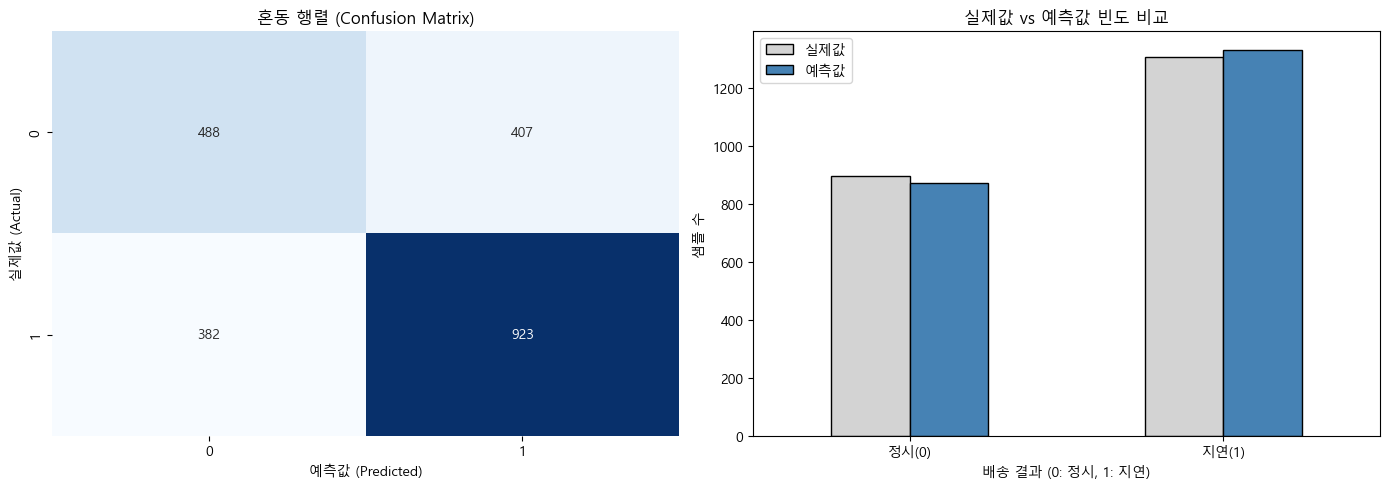

예측 통계:
- 전체 샘플 수: 2200
- 정답 수: 1411
- 정확도(Accuracy): 0.6414


In [172]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값 생성 (타겟 변수명인 'target' 사용)
best_predictions = predictor.predict(x_test)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_xlabel('예측값 (Predicted)')
axes[0].set_ylabel('실제값 (Actual)')
axes[0].set_title('혼동 행렬 (Confusion Matrix)')

# 2. 실제값 vs 예측값 빈도 비교
comparison_df = pd.DataFrame({
    '실제값': y_test.value_counts().sort_index(),
    '예측값': pd.Series(best_predictions).value_counts().sort_index()
})
comparison_df.plot(kind='bar', ax=axes[1], color=['lightgray', 'steelblue'], edgecolor='black')
axes[1].set_xlabel('배송 결과 (0: 정시, 1: 지연)')
axes[1].set_ylabel('샘플 수')
axes[1].set_title('실제값 vs 예측값 빈도 비교')
axes[1].set_xticklabels(['정시(0)', '지연(1)'], rotation=0)

plt.tight_layout()
plt.show()

# 분류 통계 출력
correct = (y_test == best_predictions).sum()
total = len(y_test)
print(f'예측 통계:')
print(f'- 전체 샘플 수: {total}')
print(f'- 정답 수: {correct}')
print(f'- 정확도(Accuracy): {(correct/total):.4f}')

### Random Forest

In [173]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

predictor = RandomForestClassifier()

# 2. 모델 학습
predictor.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [174]:
# 검증 데이터 성능 평가
y_pred = predictor.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('=== 검증 데이터 분류 성능 ===')
print(f'Accuracy (정확도): {accuracy:.4f}')
print(f'Precision (정밀도): {precision:.4f}')
print(f'Recall (재현율): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

=== 검증 데이터 분류 성능 ===
Accuracy (정확도): 0.6482
Precision (정밀도): 0.7214
Recall (재현율): 0.6628
F1 Score: 0.6909


=== 특성 중요도 ===


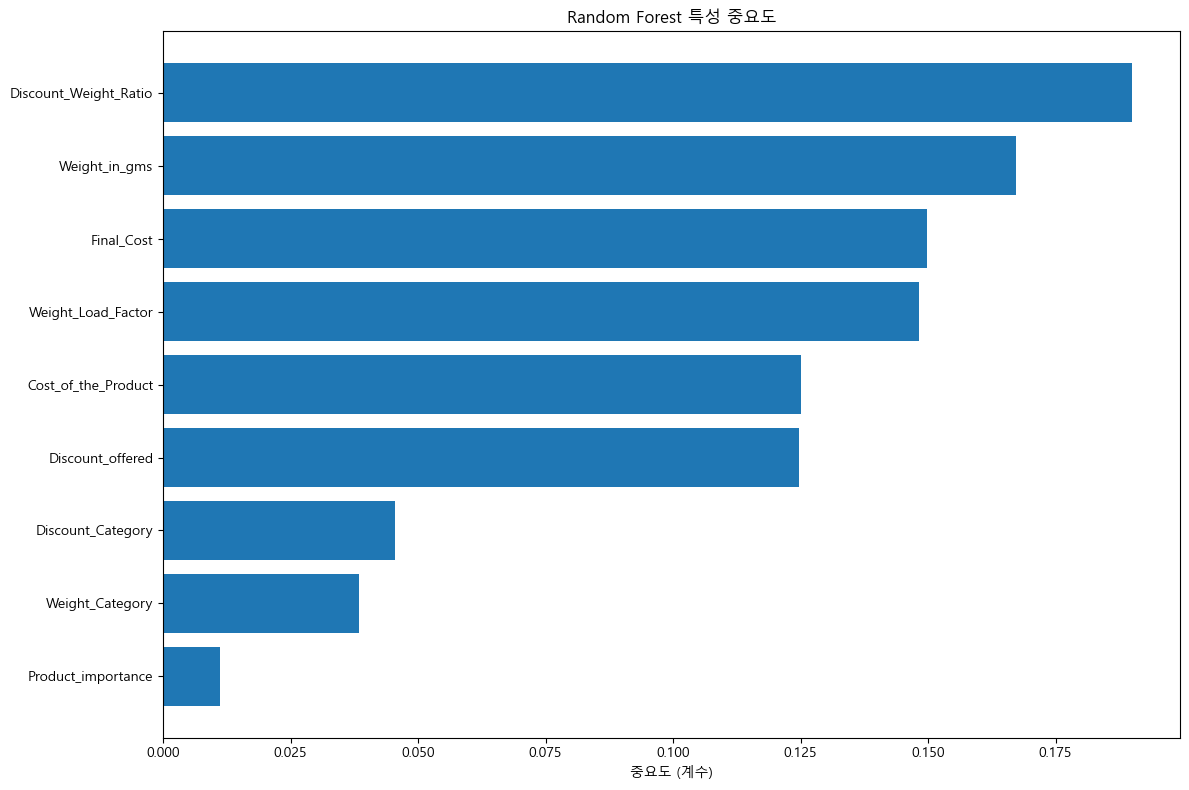

In [175]:
# 특성 중요도
print('=== 특성 중요도 ===')
feature_importance = pd.DataFrame({
    'feature': x_train.columns,
    'importance': predictor.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))

top_features = feature_importance

plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('중요도 (계수)')
plt.title('Random Forest 특성 중요도')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

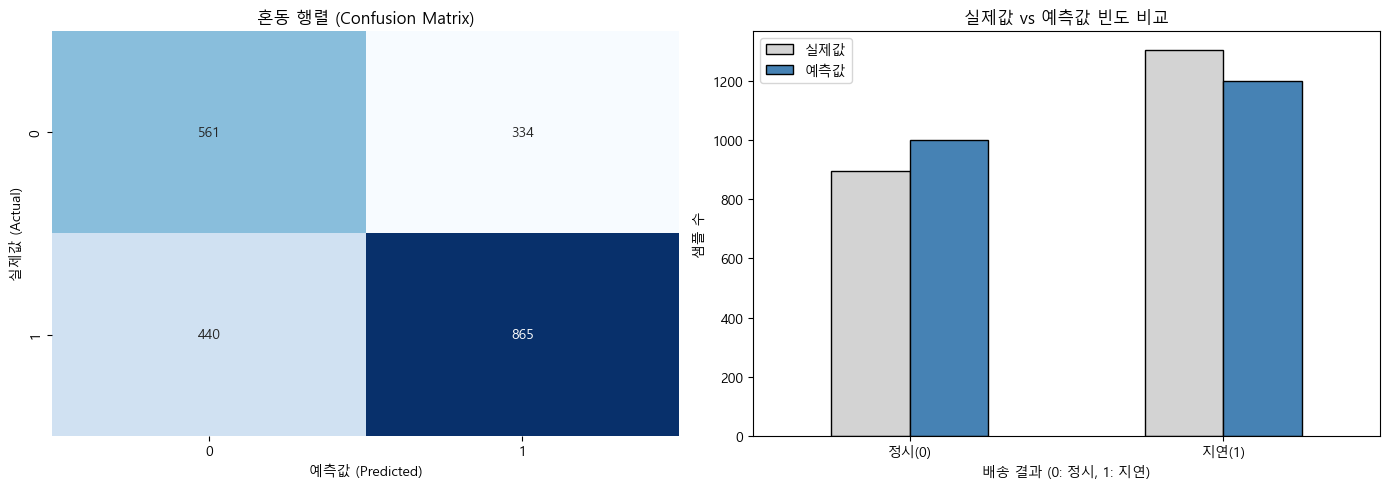

예측 통계:
- 전체 샘플 수: 2200
- 정답 수: 1426
- 정확도(Accuracy): 0.6482


In [176]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값 생성 (타겟 변수명인 'target' 사용)
best_predictions = predictor.predict(x_test)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_xlabel('예측값 (Predicted)')
axes[0].set_ylabel('실제값 (Actual)')
axes[0].set_title('혼동 행렬 (Confusion Matrix)')

# 2. 실제값 vs 예측값 빈도 비교
comparison_df = pd.DataFrame({
    '실제값': y_test.value_counts().sort_index(),
    '예측값': pd.Series(best_predictions).value_counts().sort_index()
})
comparison_df.plot(kind='bar', ax=axes[1], color=['lightgray', 'steelblue'], edgecolor='black')
axes[1].set_xlabel('배송 결과 (0: 정시, 1: 지연)')
axes[1].set_ylabel('샘플 수')
axes[1].set_title('실제값 vs 예측값 빈도 비교')
axes[1].set_xticklabels(['정시(0)', '지연(1)'], rotation=0)

plt.tight_layout()
plt.show()

# 분류 통계 출력
correct = (y_test == best_predictions).sum()
total = len(y_test)
print(f'예측 통계:')
print(f'- 전체 샘플 수: {total}')
print(f'- 정답 수: {correct}')
print(f'- 정확도(Accuracy): {(correct/total):.4f}')

### AutoGluon

In [177]:
# 합치기
train_data = pd.concat([x_train, y_train], axis=1)
test_data = pd.concat([x_test, y_test], axis=1)

print(f'학습 데이터 크기: {train_data.shape}')
print(f'검증 데이터 크기: {test_data.shape}')

학습 데이터 크기: (8799, 10)
검증 데이터 크기: (2200, 10)


In [178]:
import numpy as np
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

predictor = TabularPredictor(
    label='target',                    # 타겟 변수
    problem_type='binary',           # 분류로 변경
    eval_metric='f1',               # 평가 지표 
    path='AutoGluon_v1'              # 모델 저장 경로
)

# 모델 학습
predictor.fit(
    train_data=train_data,
    tuning_data=test_data,             # 검증 데이터
    use_bag_holdout=True,
    presets='medium_quality',            # 프리셋: 중간 품질
    time_limit=300,                      # 최대 5분
    verbosity=2,                          # 로그 상세도
    ag_args_fit={'model_random_seed': SEED} 
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26200
CPU Count:          8
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       1.24 GB / 7.86 GB (15.8%)
Disk Space Avail:   109.41 GB / 237.43 GB (46.1%)
Presets specified: ['medium_quality']
Using hyperparameters preset: hyperparameters='default'
Failed to save metadata file due to exception 'NoneType' object has no attribute 'lower', skipping...
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "c:\Users\User\github\DataScience\Ecom_Shipping\AutoGluon_v1"
Train Data Rows:    8799
Train Data Columns: 9
Tuning Data Rows:    2200
Tuning Data Columns: 9
Label Column:       target
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature 

In [179]:
leaderboard = predictor.leaderboard(test_data,silent=True)
print(leaderboard[['model','score_val','fit_time']])

                  model  score_val   fit_time
0   WeightedEnsemble_L2   0.746682  13.165570
1              LightGBM   0.746191   4.766845
2               XGBoost   0.745374   7.374476
3            LightGBMXT   0.744650   5.155852
4         LightGBMLarge   0.744650   5.898887
5       NeuralNetFastAI   0.700632  48.521546
6      RandomForestGini   0.692920   8.813174
7        ExtraTreesGini   0.692706   6.424023
8      RandomForestEntr   0.690012  10.910725
9        ExtraTreesEntr   0.687776   7.527239
10             CatBoost   0.661721  11.042323
11       NeuralNetTorch   0.659252  53.187121


In [180]:
# 검증 데이터 성능 평가
val_predictions = predictor.predict(test_data.drop('target', axis=1))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. 성능 지표 계산
accuracy = accuracy_score(y_test, val_predictions)
precision = precision_score(y_test, val_predictions)
recall = recall_score(y_test, val_predictions)
f1 = f1_score(y_test, val_predictions)

print('=== 검증 데이터 분류 성능 ===')
print(f'Accuracy (정확도): {accuracy:.4f}')
print(f'Precision (정밀도): {precision:.4f}')
print(f'Recall (재현율): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

=== 검증 데이터 분류 성능 ===
Accuracy (정확도): 0.6009
Precision (정밀도): 0.5988
Recall (재현율): 0.9916
F1 Score: 0.7467


Computing feature importance via permutation shuffling for 9 features using 2200 rows with 5 shuffle sets...
	3.52s	= Expected runtime (0.7s per shuffle set)


=== 특성 중요도 ===


	1.46s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Weight_Load_Factor,0.002544,0.000968,0.002092,5,0.004536,0.000552
Cost_of_the_Product,0.002236,0.000593,0.000540,5,0.003457,0.001016
Weight_in_gms,0.000884,0.000480,0.007302,5,0.001872,-0.000104
Final_Cost,0.000616,0.000695,0.059239,5,0.002048,-0.000815
Weight_Category,0.000412,0.000772,0.149434,5,0.002001,-0.001178
Discount_offered,0.000266,0.000578,0.180952,5,0.001456,-0.000924
Discount_Weight_Ratio,0.000120,0.000216,0.140342,5,0.000564,-0.000324
Discount_Category,0.000000,0.000000,0.500000,5,0.000000,0.000000
Product_importance,0.000000,0.000000,0.500000,5,0.000000,0.000000


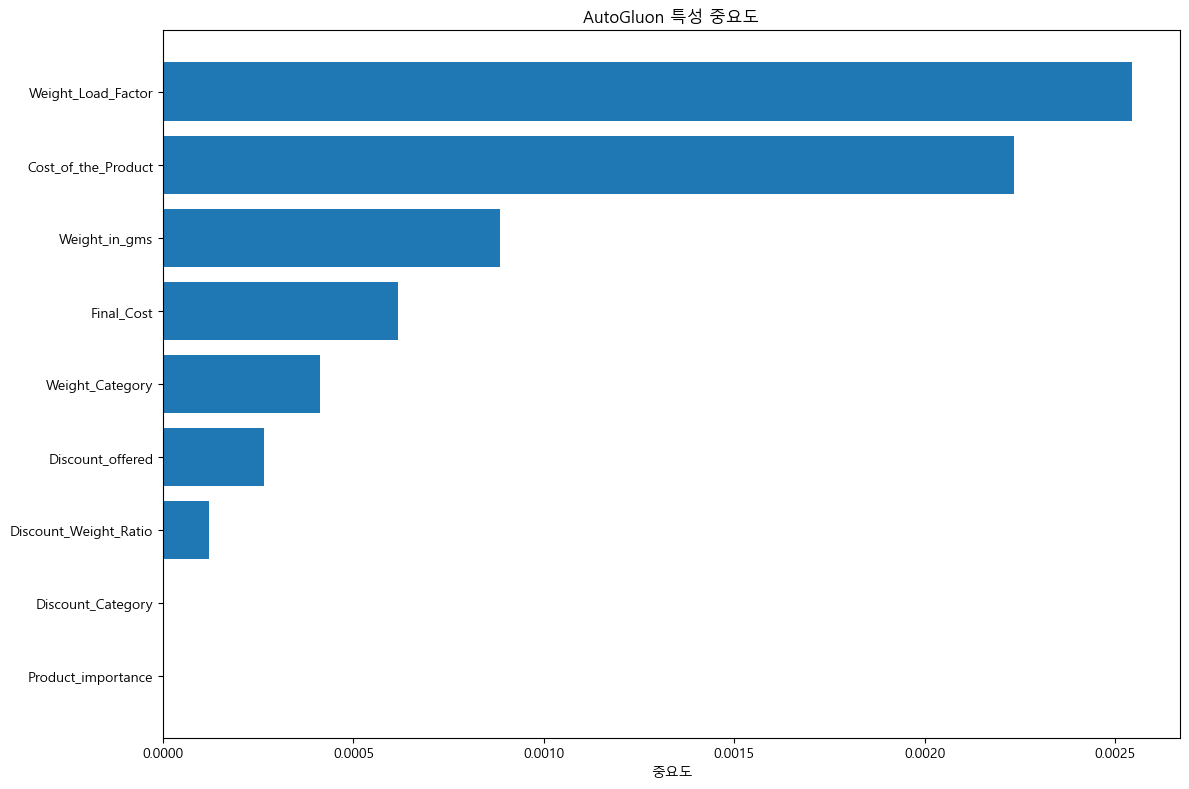

In [181]:
# 특성 중요도
print('=== 특성 중요도 ===')
feature_importance = predictor.feature_importance(test_data)
display(feature_importance)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
top_features = feature_importance
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('중요도')
plt.title('AutoGluon 특성 중요도')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

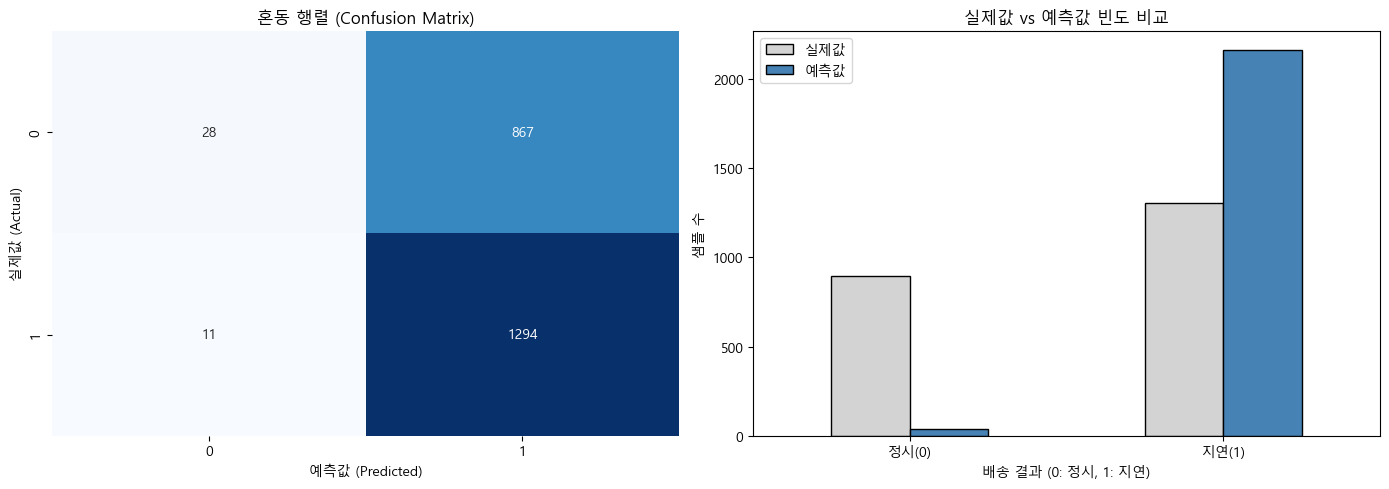

예측 통계:
- 전체 샘플 수: 2200
- 정답 수: 1322
- 정확도(Accuracy): 0.6009


In [182]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값 생성 (타겟 변수명인 'target' 사용)
best_predictions = predictor.predict(test_data.drop('target', axis=1))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_xlabel('예측값 (Predicted)')
axes[0].set_ylabel('실제값 (Actual)')
axes[0].set_title('혼동 행렬 (Confusion Matrix)')

# 2. 실제값 vs 예측값 빈도 비교
comparison_df = pd.DataFrame({
    '실제값': y_test.value_counts().sort_index(),
    '예측값': pd.Series(best_predictions).value_counts().sort_index()
})
comparison_df.plot(kind='bar', ax=axes[1], color=['lightgray', 'steelblue'], edgecolor='black')
axes[1].set_xlabel('배송 결과 (0: 정시, 1: 지연)')
axes[1].set_ylabel('샘플 수')
axes[1].set_title('실제값 vs 예측값 빈도 비교')
axes[1].set_xticklabels(['정시(0)', '지연(1)'], rotation=0)

plt.tight_layout()
plt.show()

# 분류 통계 출력
correct = (y_test == best_predictions).sum()
total = len(y_test)
print(f'예측 통계:')
print(f'- 전체 샘플 수: {total}')
print(f'- 정답 수: {correct}')
print(f'- 정확도(Accuracy): {(correct/total):.4f}')

In [184]:
import numpy as np
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

predictor = TabularPredictor(
    label='target',                    # 타겟 변수
    problem_type='binary',           # 분류로 변경
    eval_metric='accuracy',               # 평가 지표 
    path='AutoGluon_v1'              # 모델 저장 경로
)

# 모델 학습
predictor.fit(
    train_data=train_data,
    tuning_data=test_data,             # 검증 데이터
    use_bag_holdout=True,
    presets='medium_quality',            # 프리셋: 중간 품질
    time_limit=300,                      # 최대 5분
    verbosity=2,                          # 로그 상세도
    ag_args_fit={'model_random_seed': SEED} 
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26200
CPU Count:          8
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       1.07 GB / 7.86 GB (13.6%)
Disk Space Avail:   109.42 GB / 237.43 GB (46.1%)
Presets specified: ['medium_quality']
Using hyperparameters preset: hyperparameters='default'
Failed to save metadata file due to exception 'NoneType' object has no attribute 'lower', skipping...
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "c:\Users\User\github\DataScience\Ecom_Shipping\AutoGluon_v1"
Train Data Rows:    8799
Train Data Columns: 9
Tuning Data Rows:    2200
Tuning Data Columns: 9
Label Column:       target
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature 

In [185]:
leaderboard = predictor.leaderboard(test_data,silent=True)
print(leaderboard[['model','score_val','fit_time']])

                  model  score_val   fit_time
0   WeightedEnsemble_L2   0.695000  59.723060
1        NeuralNetTorch   0.693636  66.508858
2       NeuralNetFastAI   0.693636  43.346782
3              CatBoost   0.690455  12.722933
4            LightGBMXT   0.687273   4.801334
5               XGBoost   0.683636   3.293831
6              LightGBM   0.677727   2.928556
7         LightGBMLarge   0.674091   5.715398
8        ExtraTreesGini   0.649545   4.770849
9      RandomForestGini   0.649091  10.991838
10     RandomForestEntr   0.645909  16.131106
11       ExtraTreesEntr   0.645909   4.222746


In [186]:
# 검증 데이터 성능 평가
val_predictions = predictor.predict(test_data.drop('target', axis=1))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. 성능 지표 계산
accuracy = accuracy_score(y_test, val_predictions)
precision = precision_score(y_test, val_predictions)
recall = recall_score(y_test, val_predictions)
f1 = f1_score(y_test, val_predictions)

print('=== 검증 데이터 분류 성능 ===')
print(f'Accuracy (정확도): {accuracy:.4f}')
print(f'Precision (정밀도): {precision:.4f}')
print(f'Recall (재현율): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

=== 검증 데이터 분류 성능 ===
Accuracy (정확도): 0.6950
Precision (정밀도): 0.9149
Recall (재현율): 0.5356
F1 Score: 0.6757


Computing feature importance via permutation shuffling for 9 features using 2200 rows with 5 shuffle sets...
	6.3s	= Expected runtime (1.26s per shuffle set)


=== 특성 중요도 ===


	6.84s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Weight_Category,0.071364,0.003340,5.742522e-07,5,0.078241,0.064486
Discount_Category,0.027273,0.004104,5.968905e-05,5,0.035722,0.018824
Weight_in_gms,0.015182,0.001626,1.555966e-05,5,0.018530,0.011833
Discount_offered,0.011182,0.004944,3.596807e-03,5,0.021361,0.001002
Discount_Weight_Ratio,0.011000,0.003423,9.931252e-04,5,0.018047,0.003953
Cost_of_the_Product,0.009909,0.003512,1.613803e-03,5,0.017141,0.002678
Final_Cost,0.006909,0.002456,1.631983e-03,5,0.011966,0.001852
Weight_Load_Factor,0.005818,0.001177,1.901843e-04,5,0.008241,0.003396
Product_importance,0.004000,0.002068,6.199398e-03,5,0.008258,-0.000258


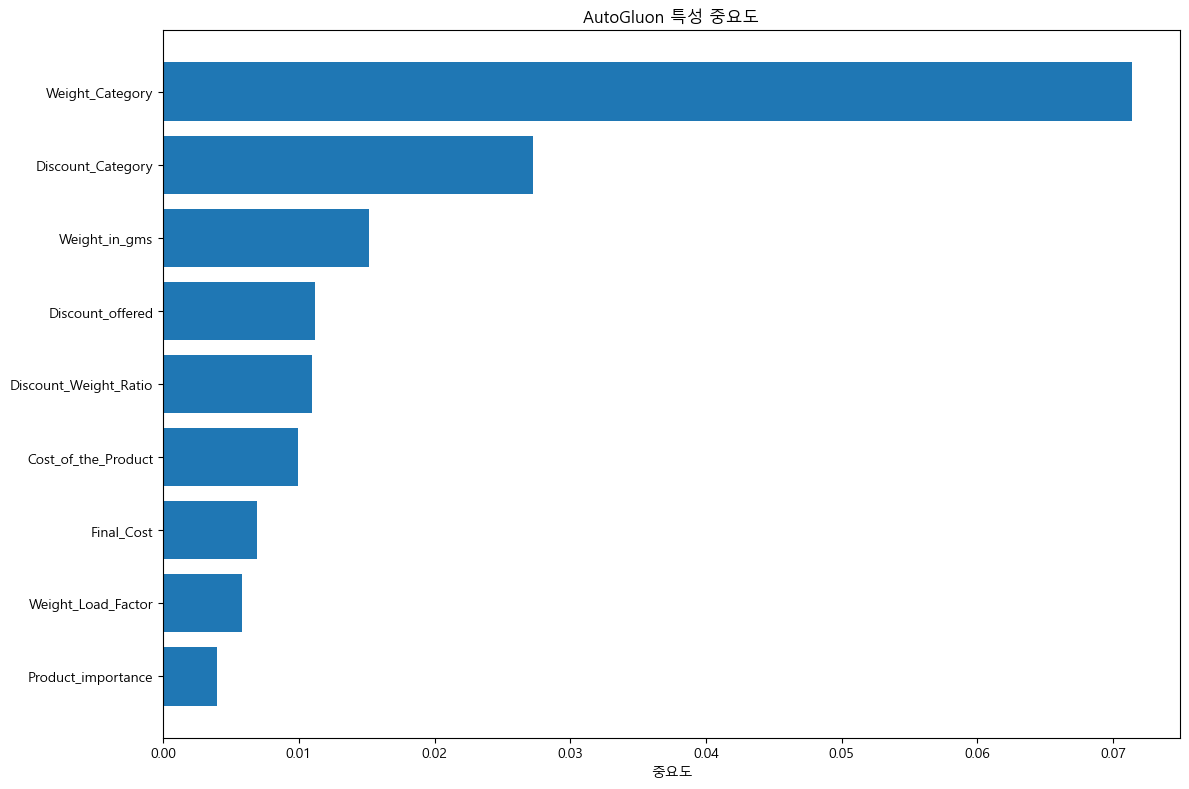

In [187]:
# 특성 중요도
print('=== 특성 중요도 ===')
feature_importance = predictor.feature_importance(test_data)
display(feature_importance)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
top_features = feature_importance
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('중요도')
plt.title('AutoGluon 특성 중요도')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

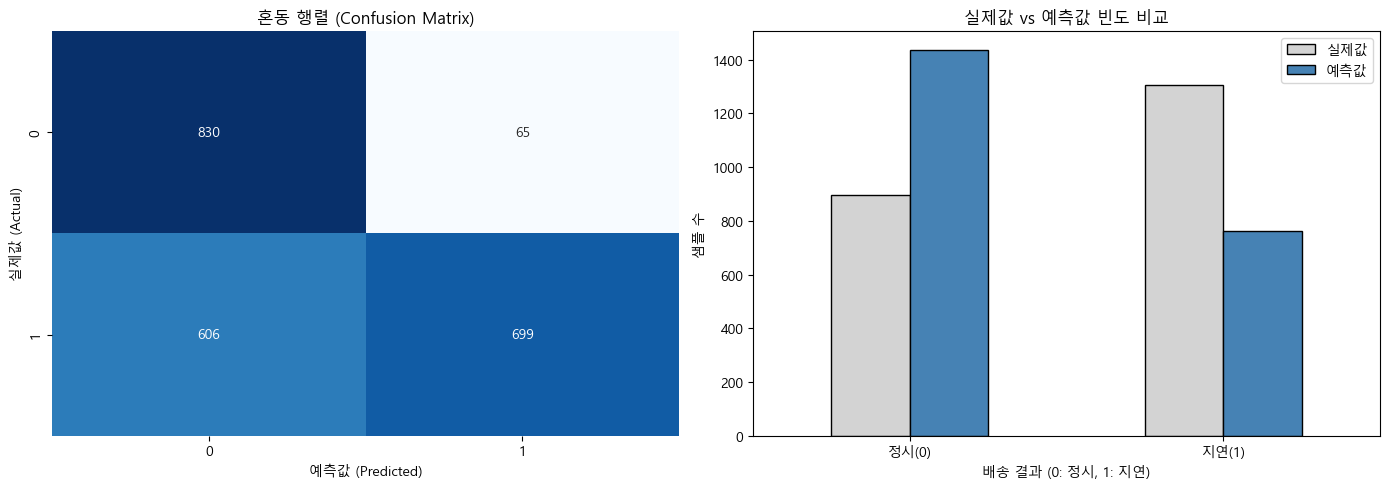

예측 통계:
- 전체 샘플 수: 2200
- 정답 수: 1529
- 정확도(Accuracy): 0.6950


In [188]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값 생성 (타겟 변수명인 'target' 사용)
best_predictions = predictor.predict(test_data.drop('target', axis=1))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_xlabel('예측값 (Predicted)')
axes[0].set_ylabel('실제값 (Actual)')
axes[0].set_title('혼동 행렬 (Confusion Matrix)')

# 2. 실제값 vs 예측값 빈도 비교
comparison_df = pd.DataFrame({
    '실제값': y_test.value_counts().sort_index(),
    '예측값': pd.Series(best_predictions).value_counts().sort_index()
})
comparison_df.plot(kind='bar', ax=axes[1], color=['lightgray', 'steelblue'], edgecolor='black')
axes[1].set_xlabel('배송 결과 (0: 정시, 1: 지연)')
axes[1].set_ylabel('샘플 수')
axes[1].set_title('실제값 vs 예측값 빈도 비교')
axes[1].set_xticklabels(['정시(0)', '지연(1)'], rotation=0)

plt.tight_layout()
plt.show()

# 분류 통계 출력
correct = (y_test == best_predictions).sum()
total = len(y_test)
print(f'예측 통계:')
print(f'- 전체 샘플 수: {total}')
print(f'- 정답 수: {correct}')
print(f'- 정확도(Accuracy): {(correct/total):.4f}')

In [190]:
import numpy as np
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

predictor = TabularPredictor(
    label='target',                    # 타겟 변수
    problem_type='binary',           # 분류로 변경
    eval_metric='roc_auc',               # 평가 지표 
    path='AutoGluon_v1'              # 모델 저장 경로
)

# 모델 학습
predictor.fit(
    train_data=train_data,
    tuning_data=test_data,             # 검증 데이터
    use_bag_holdout=True,
    presets='medium_quality',            # 프리셋: 중간 품질
    time_limit=300,                      # 최대 5분
    verbosity=2,                          # 로그 상세도
    ag_args_fit={'model_random_seed': SEED} 
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26200
CPU Count:          8
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       1.33 GB / 7.86 GB (16.9%)
Disk Space Avail:   109.42 GB / 237.43 GB (46.1%)
Presets specified: ['medium_quality']
Using hyperparameters preset: hyperparameters='default'
Failed to save metadata file due to exception 'NoneType' object has no attribute 'lower', skipping...
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "c:\Users\User\github\DataScience\Ecom_Shipping\AutoGluon_v1"
Train Data Rows:    8799
Train Data Columns: 9
Tuning Data Rows:    2200
Tuning Data Columns: 9
Label Column:       target
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature 

In [191]:
leaderboard = predictor.leaderboard(test_data,silent=True)
print(leaderboard[['model','score_val','fit_time']])

                  model  score_val   fit_time
0   WeightedEnsemble_L2   0.758823  62.236024
1        NeuralNetTorch   0.758808  51.693012
2       NeuralNetFastAI   0.755573  81.233282
3              CatBoost   0.754180   9.585740
4            LightGBMXT   0.745210   8.625533
5               XGBoost   0.742773   4.448136
6              LightGBM   0.742760   4.804251
7         LightGBMLarge   0.741737  12.606542
8        ExtraTreesEntr   0.736150   4.120245
9        ExtraTreesGini   0.735470   4.822956
10     RandomForestEntr   0.733877  20.853615
11     RandomForestGini   0.733211  12.591180


In [192]:
# 검증 데이터 성능 평가
val_predictions = predictor.predict(test_data.drop('target', axis=1))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. 성능 지표 계산
accuracy = accuracy_score(y_test, val_predictions)
precision = precision_score(y_test, val_predictions)
recall = recall_score(y_test, val_predictions)
f1 = f1_score(y_test, val_predictions)

print('=== 검증 데이터 분류 성능 ===')
print(f'Accuracy (정확도): {accuracy:.4f}')
print(f'Precision (정밀도): {precision:.4f}')
print(f'Recall (재현율): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

=== 검증 데이터 분류 성능 ===
Accuracy (정확도): 0.6909
Precision (정밀도): 0.9728
Recall (재현율): 0.4927
F1 Score: 0.6541


Computing feature importance via permutation shuffling for 9 features using 2200 rows with 5 shuffle sets...


=== 특성 중요도 ===


	75.75s	= Expected runtime (15.15s per shuffle set)
	6.45s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Weight_Category,0.090557,0.003957,4.361538e-07,5,0.098704,0.082410
Weight_in_gms,0.010386,0.002649,4.665353e-04,5,0.015840,0.004932
Weight_Load_Factor,0.005544,0.002832,5.952155e-03,5,0.011375,-0.000288
Discount_Category,0.004365,0.002383,7.457616e-03,5,0.009272,-0.000543
Final_Cost,0.003632,0.001444,2.455498e-03,5,0.006604,0.000659
Discount_offered,0.003067,0.002985,4.160757e-02,5,0.009214,-0.003080
Cost_of_the_Product,0.001463,0.001968,8.591094e-02,5,0.005515,-0.002589
Product_importance,0.000940,0.002958,2.582799e-01,5,0.007032,-0.005151
Discount_Weight_Ratio,-0.001826,0.001168,9.875158e-01,5,0.000578,-0.004231


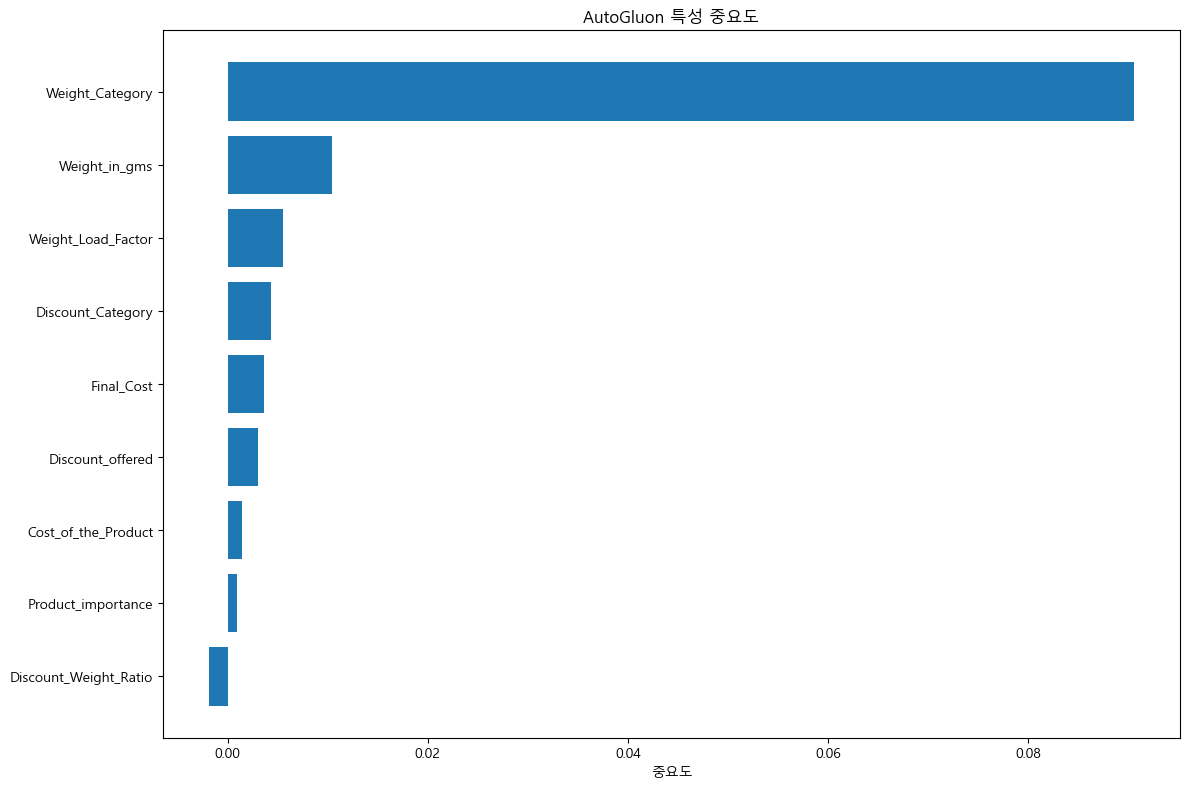

In [193]:
# 특성 중요도
print('=== 특성 중요도 ===')
feature_importance = predictor.feature_importance(test_data)
display(feature_importance)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
top_features = feature_importance
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('중요도')
plt.title('AutoGluon 특성 중요도')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

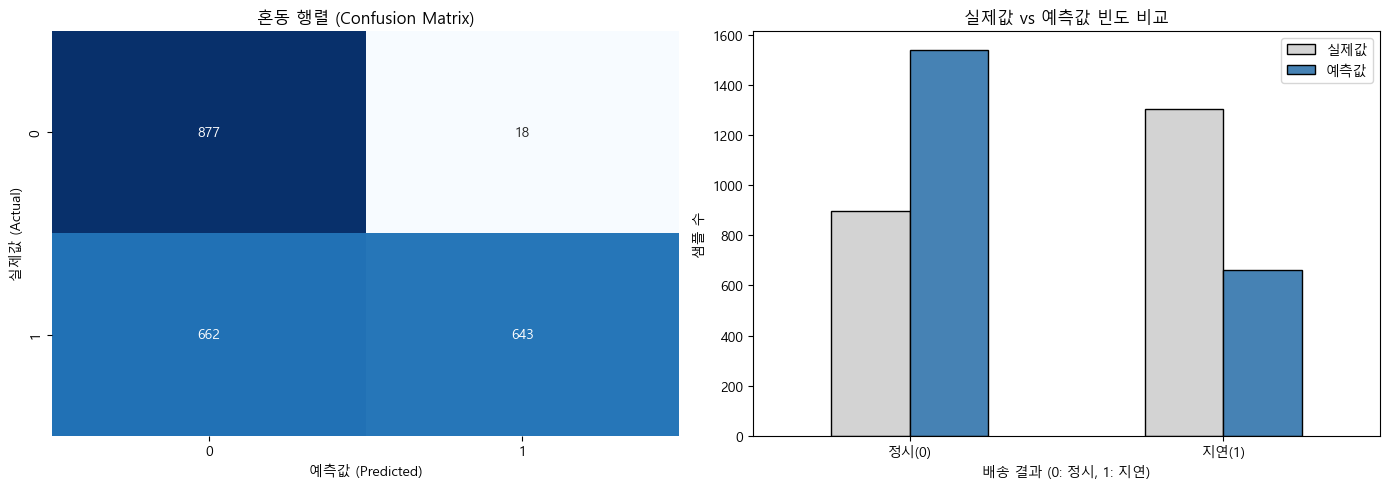

예측 통계:
- 전체 샘플 수: 2200
- 정답 수: 1520
- 정확도(Accuracy): 0.6909


In [194]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값 생성 (타겟 변수명인 'target' 사용)
best_predictions = predictor.predict(test_data.drop('target', axis=1))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_xlabel('예측값 (Predicted)')
axes[0].set_ylabel('실제값 (Actual)')
axes[0].set_title('혼동 행렬 (Confusion Matrix)')

# 2. 실제값 vs 예측값 빈도 비교
comparison_df = pd.DataFrame({
    '실제값': y_test.value_counts().sort_index(),
    '예측값': pd.Series(best_predictions).value_counts().sort_index()
})
comparison_df.plot(kind='bar', ax=axes[1], color=['lightgray', 'steelblue'], edgecolor='black')
axes[1].set_xlabel('배송 결과 (0: 정시, 1: 지연)')
axes[1].set_ylabel('샘플 수')
axes[1].set_title('실제값 vs 예측값 빈도 비교')
axes[1].set_xticklabels(['정시(0)', '지연(1)'], rotation=0)

plt.tight_layout()
plt.show()

# 분류 통계 출력
correct = (y_test == best_predictions).sum()
total = len(y_test)
print(f'예측 통계:')
print(f'- 전체 샘플 수: {total}')
print(f'- 정답 수: {correct}')
print(f'- 정확도(Accuracy): {(correct/total):.4f}')